In [1]:
from spectrochempy.api import *
source = read_omnic(NDDataset(), os.path.join(scpdata, 'irdata', 'NH4Y-activation.SPG'))


        SpectroChemPy's API
        Version   : 0.1a3.dev
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


<IPython.core.display.Javascript object>


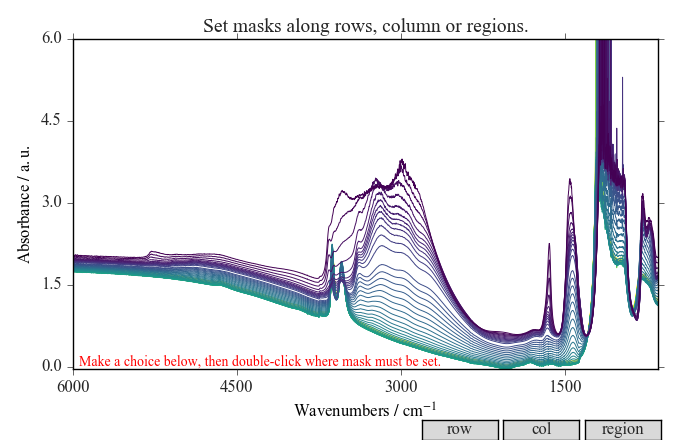

In [2]:
from matplotlib.widgets import Button


source.plot_stack(colorbar=False)
source.axes['main'].set_title('Set masks along rows, column or regions.', fontsize='14')
source.axes['main'].text(0.01, 0.01, 
                    'Make a choice below, '
                    'then double-click where mask must be set.', color='red',
                         transform=source.axes['main'].transAxes, fontsize='10')
ax = source.axes['main']
axrow = plt.axes([0.62, 0.001, 0.112, 0.045])
axcol = plt.axes([0.74, 0.001, 0.112, 0.045])
axreg = plt.axes([0.86, 0.001, 0.112, 0.045])
brow = Button(axrow, 'row', hovercolor = '#55FFFF')
bcol = Button(axcol, 'col', hovercolor = '#55FFFF')
breg = Button(axreg, 'region', hovercolor = '#55FFFF')
color = brow.color
hover = brow.hovercolor
    
class _InteractiveMask():
    
    @staticmethod
    def set_aspect(button):   
        for b, lab in zip([brow, bcol, breg],['row', 'col', 'region']):
            b.label.set_text(lab) 
            b.color = color
        button.label.set_text(button.label.get_text()+' ON')
        button.color = '#DDFFFF'
        source.button_selected = button
    
    def row(self, event):
        set_aspect(brow)
        plt.draw()
        
    def col(self, event):
        set_aspect(bcol)
        
    def reg(self, event):
        set_aspect(breg)
        
callback = _InteractiveMask() 

brow.on_clicked(callback.row)
bcol.on_clicked(callback.col)
breg.on_clicked(callback.reg)

def _onclick(event):
    message='%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (
        'double' if event.dblclick else 'single', event.button, event.x, event.y, event.xdata, event.ydata)
    
    event.inaxes.text(0.0, 0.95, message, fontsize=10, transform=source.axes['main'].transAxes, 
                      bbox={'facecolor':'white',})
    pass

cid = source.fig.canvas.mpl_connect('button_press_event', _onclick)

In [13]:
"{s.data[0][0]:.2f}".format(s = source)


'2.06'